In [20]:
# Libraries that help read and edit file 
import os
import numpy as np
import pandas as pd

# Data Preprocessing 

In [21]:
df = pd.read_csv(os.path.join('data','calories', 'Total_Daily_Calories.csv')) # read a file Total_Daily_Calories.csv 
df.head(3) # Show the frist three of the rows

,Person,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,T,59,Male,95.698543,162.002710,Very Active,95,80,247.288159,105.027564,False,False,False,True,1679.502366,1774.478286
1,X,78,Male,95.300594,186.485409,Moderate,112,63,160.221120,129.622977,False,True,False,False,1733.539746,1338.725045
2,Y,42,Male,89.201163,189.557492,Sedentary,129,78,236.642406,166.855089,True,False,False,True,1871.745957,5251.430617


In [22]:
df.drop("Person",inplace=True,axis=1) # Delete the Person column because it does not contain useful data
df.info() # View some data for each columns, such as entries sum and data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   999 non-null    int64  
 1   Gender                999 non-null    object 
 2   Weight                999 non-null    float64
 3   Height                999 non-null    float64
 4   Activity Level        999 non-null    object 
 5   Systolic BP           999 non-null    int64  
 6   Diastolic BP          999 non-null    int64  
 7   Cholesterol Level     999 non-null    float64
 8   Blood Sugar           999 non-null    float64
 9   Hypertension          999 non-null    bool   
 10  Low Pressure          999 non-null    bool   
 11  Diabetes              999 non-null    bool   
 12  Heart Condition       999 non-null    bool   
 13  BMR                   999 non-null    float64
 14  Total Daily Calories  999 non-null    float64
dtypes: bool(4), float64(6),

In [23]:
df["Activity Level"].unique() # Know all the unique value within the 'Activity Level' column

array(['Very Active', 'Moderate', 'Sedentary', 'Light', 'Active'],
      dtype=object)

# Part Encode

In [24]:
# we encode some features(column) to help the model learn better 
# And also because it should be integer or float 

from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
encoder = LabelEncoder()
# Fit and transform the data
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Diabetes'] = encoder.fit_transform(df['Diabetes'])
df['Low Pressure'] = encoder.fit_transform(df['Low Pressure'])
df['Hypertension'] = encoder.fit_transform(df['Hypertension'])
df['Heart Condition'] = encoder.fit_transform(df['Heart Condition'])

# Ordinal encoding
activity_levels = {'Very Active': 4, 'Active': 3, 'Moderate': 2, 'Light': 1, 'Sedentary': 0}
# Encoding the data
df["Activity Level"] = [activity_levels[level] for level in df["Activity Level"]]

df.head(12) # Show the frist twelve of the rows

,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,59,1,95.698543,162.002710,4,95,80,247.288159,105.027564,0,0,0,1,1679.502366,1774.478286
1,78,1,95.300594,186.485409,2,112,63,160.221120,129.622977,0,1,0,0,1733.539746,1338.725045
2,42,1,89.201163,189.557492,0,129,78,236.642406,166.855089,1,0,0,1,1871.745957,5251.430617
3,78,1,73.470440,160.670429,4,163,65,176.480249,183.729538,1,0,0,0,1353.894578,3127.364277
4,76,1,95.194342,188.238706,4,95,55,199.236508,103.810610,0,1,1,1,1753.435339,1179.391572
5,50,1,87.802662,189.780281,2,145,109,251.689715,135.890941,1,0,0,1,1819.153376,7018.974663
6,46,1,93.772934,185.375870,1,144,62,268.108874,150.508711,1,0,1,1,1871.328529,3811.791441
7,33,1,55.122374,184.400910,0,82,88,188.798108,116.779453,0,0,1,0,1543.729433,1583.596797
8,68,1,97.139075,176.268032,1,107,84,207.286143,168.395687,1,1,0,0,1738.065946,3151.904993
9,62,0,84.064154,155.518709,4,166,111,221.382894,171.478184,0,0,0,0,1341.633470,6589.514300


In [25]:
df = df.round() # Round the number to the nearest correct number
df = df.astype(int) # Convert form float to integer
df.head(3) # Show the frist three of the rows

,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,59,1,96,162,4,95,80,247,105,0,0,0,1,1680,1774
1,78,1,95,186,2,112,63,160,130,0,1,0,0,1734,1339
2,42,1,89,190,0,129,78,237,167,1,0,0,1,1872,5251


In [26]:
df.to_csv(os.path.join('data','calories', 'New_Total_Daily_Calories.csv')) # Save the edits in a new file

# Data visualization 

In [27]:

df = pd.read_csv(os.path.join('data','calories', 'New_Total_Daily_Calories.csv')) # read a file New_Total_Daily_Calories.csv 
df.head(3) # Show the frist three of the rows

,Unnamed: 0,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,0,59,1,96,162,4,95,80,247,105,0,0,0,1,1680,1774
1,1,78,1,95,186,2,112,63,160,130,0,1,0,0,1734,1339
2,2,42,1,89,190,0,129,78,237,167,1,0,0,1,1872,5251


In [28]:
df.drop(["Unnamed: 0"],inplace=True ,axis=1) # Delete the Person column because it does not contain useful data
print("Sum duplicated = ",df.duplicated().sum()) # Find out the sum of the duplicated data  in the file
df.describe().T # View data describe to see if the data cotains any illogical numbers

Sum duplicated =  0


,count,mean,std,min,25%,50%,75%,max
Age,999.0,54.458458,14.868226,30.0,42.0,54.0,68.0,80.0
Gender,999.0,0.488488,0.500118,0.0,0.0,0.0,1.0,1.0
Weight,999.0,75.164164,14.474879,50.0,62.5,75.0,88.0,100.0
Height,999.0,170.442442,11.777175,150.0,161.0,170.0,181.0,190.0
Activity Level,999.0,1.997998,1.438797,0.0,1.0,2.0,3.0,4.0
Systolic BP,999.0,130.660661,31.508118,60.0,106.0,131.0,154.0,200.0
Diastolic BP,999.0,85.925926,21.616500,40.0,69.0,86.0,103.0,130.0
Cholesterol Level,999.0,196.541542,37.516703,120.0,167.0,196.0,227.0,270.0
Blood Sugar,999.0,147.354354,40.527095,70.0,114.0,147.0,180.0,230.0
Hypertension,999.0,0.517518,0.499943,0.0,0.0,1.0,1.0,1.0


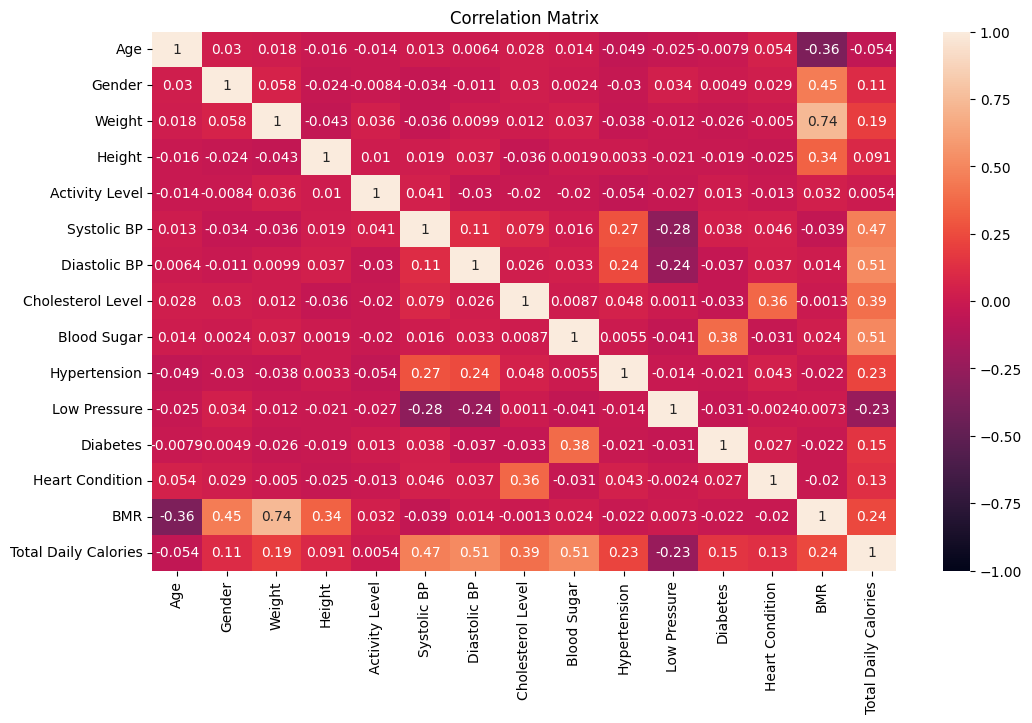

In [29]:
# Make a correlation between the columns and some of them, and show it tow know the type of this correlation

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

# Model ML

In [30]:
# Split the data into two parts, part one tranning and part two testing in a random way
# So that it is sent to the model for learning(fit) and testin(predict)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

x = df.drop('Total Daily Calories', axis = 1)
y = df['Total Daily Calories']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train) # Fit the model

preds_train = lr_model.predict(x_train) # Predict part one the model
print("Train = ",r2_score(y_train, preds_train)*100)
preds_test = lr_model.predict(x_test) # Predict part two the model
print("Test = ",r2_score(y_test, preds_test)*100)

Train =  83.92885022294917
Test =  85.91042142883482


In [31]:
from sklearn.ensemble import RandomForestRegressor

reg_forest = RandomForestRegressor(random_state = 42, criterion = 'squared_error')
reg_forest.fit(x_train, y_train) # Fit the model

preds_forest_test = reg_forest.predict(x_train)   # Predict part one the model
print("Train = ",r2_score(y_train, preds_forest_test)*100)
preds_forest_test = reg_forest.predict(x_test)   # Predict part two the model
print("Test = ",r2_score(y_test, preds_forest_test)*100)

Train =  97.84613762127464
Test =  86.55354551187813


In [32]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=100, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(x_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(x_test, y_test)))

Training Score: 0.923725578653601
Test Score: 0.9170397079270267


In [33]:
steps = [
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(x_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(x_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(x_test, y_test)))

Training score: 0.8392728489796272
Test score: 0.8593186246514405


In [34]:
# Save the trained model
import joblib
joblib.dump(lasso_pipe, os.path.join('models', 'Calories.pkl'))

['models\\Calories.pkl']

# Test for the model

In [35]:
import joblib
import  os
# load the saved model from a file
loaded_model = joblib.load(os.path.join('models', 'Calories.pkl'))
# use the loaded model to make predictions
preds_loaded_test = loaded_model.predict([[78,1,95,186,2,112,63,160,130,0,1,0,0,1734]])

print("Total Daily Calories = ",preds_loaded_test[0].item())

Total Daily Calories =  1513.961348525705


c:\Users\am505\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
